# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [14]:
# Extract all rows of data
table = soup.find('table', class_='table')
table_rows = table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Extract Headers
column_headers = [header.text for header in table.find_all('th')]

# Create and empty list
rows = []

# Loop through the scraped data to create a list of rows
for tr in table_rows:
    cells = tr.find_all('td')
    row = [cell.text for cell in cells]
    rows.append(row)    

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_data_df = pd.DataFrame(rows, columns=column_headers)

In [17]:
# Confirm DataFrame was created successfully
mars_temp_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [19]:
# Examine data type of each column
print(mars_temp_data_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [20]:
# Change data types for data analysis
# Change 'terrestrial_date' to datetime
mars_temp_data_df['terrestrial_date'] = pd.to_datetime(mars_temp_data_df['terrestrial_date'])

# Change 'sol', 'ls', and 'month' to the integer datatype
mars_temp_data_df['sol'] = mars_temp_data_df['sol'].astype(int)
mars_temp_data_df['ls'] = mars_temp_data_df['ls'].astype(int)
mars_temp_data_df['month'] = mars_temp_data_df['month'].astype(int)

# Change 'min_temp' and 'pressure' to the float datatype
mars_temp_data_df['min_temp'] = mars_temp_data_df['min_temp'].astype(float)
mars_temp_data_df['pressure'] = mars_temp_data_df['pressure'].astype(float)

In [21]:
# Confirm type changes were successful by examining data types again
print(mars_temp_data_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
months = mars_temp_data_df['month'].unique().tolist()
month_count = len(months)
month_count

12

In [25]:
# 2. How many sols (Martian days) worth of data are there?
m_days = mars_temp_data_df['sol'].unique().tolist()
m_days_count = len(m_days)
m_days_count

1867

In [29]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_temp_data_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='Month', ylabel='Temperature in Celsius'>

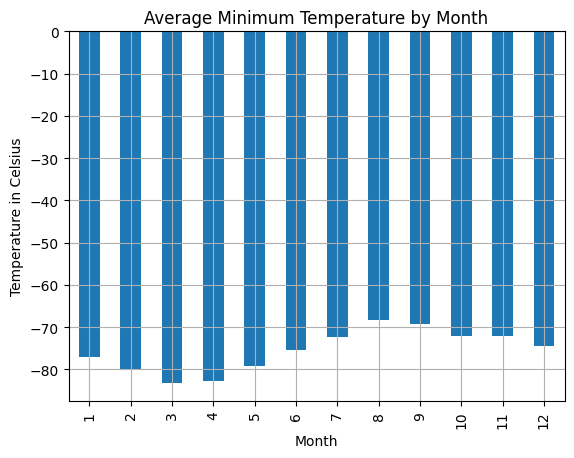

In [47]:
# Plot the average minimum temperature by month
avg_min_temp.plot(
    kind='bar',
    xlabel='Month',
    ylabel='Temperature in Celsius',
    title='Average Minimum Temperature by Month',
    grid=True
)

<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='Month', ylabel='Temperature in Celsius'>

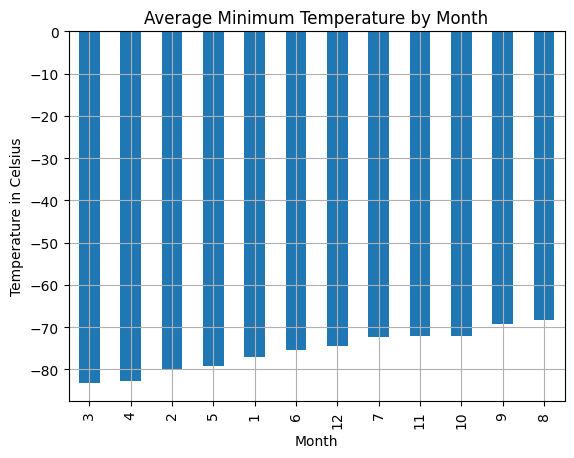

In [48]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values()
avg_min_temp_sorted.plot(
    kind='bar',
    xlabel='Month',
    ylabel='Temperature in Celsius',
    title='Average Minimum Temperature by Month',
    grid=True
)

In [49]:
# 4. What is the average pressure by month?
avg_pressure = mars_temp_data_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: title={'center': 'Average Pressure by Month'}, xlabel='Month', ylabel='Atmospheric Pressure'>

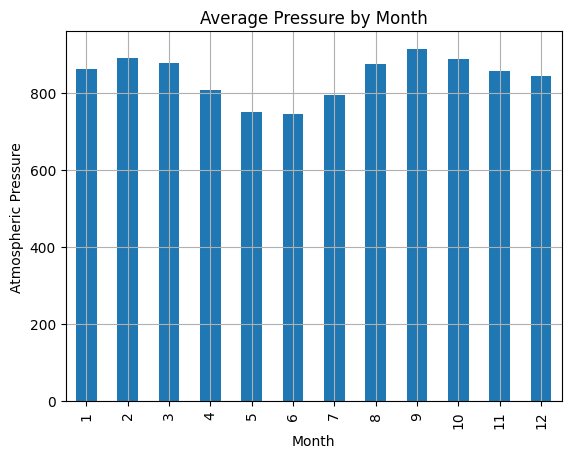

In [50]:
# Plot the average pressure by month
avg_pressure.plot(
    kind='bar',
    xlabel='Month',
    ylabel='Atmospheric Pressure',
    title='Average Pressure by Month',
    grid=True
)

<Axes: title={'center': 'Average Pressure by Month'}, xlabel='Month', ylabel='Atmospheric Pressure'>

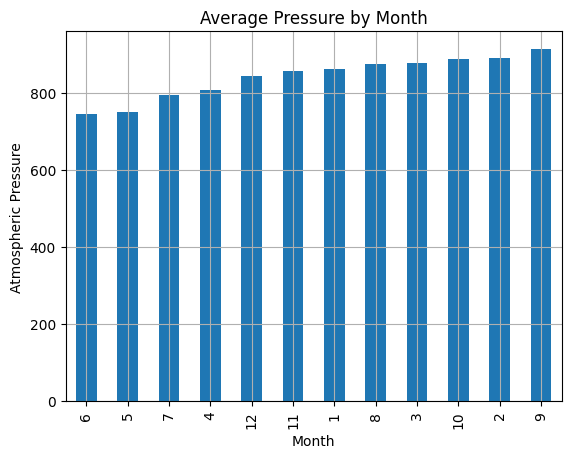

In [51]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sorted = avg_pressure.sort_values()
avg_pressure_sorted.plot(
    kind='bar',
    xlabel='Month',
    ylabel='Atmospheric Pressure',
    title='Average Pressure by Month',
    grid=True
)

<Axes: title={'center': 'Minimum Temperature over Time'}, xlabel='Number of Terestrial Days', ylabel='Minimum Temperature'>

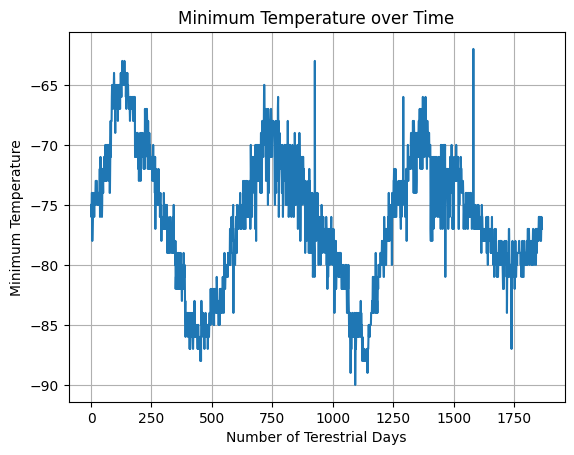

In [44]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_temp_data_df['min_temp'].plot(
    xlabel='Number of Terestrial Days',
    ylabel='Minimum Temperature',
    title='Minimum Temperature over Time',
    grid=True
)

## Minimum Temperature Analysis

There are several inferences we can make about the minimum temperature of Mars from this Dataset and analysis. The coldest month of the Martian year for Mars is the third month. We can see this displayed in the 'Average Minimum Temperature by Month' chart where the third month is lower than -80 degrees Celsius. Meanwhile, the warmest month of the Martian year is the eighth month with the average minimum temperature is approximately -68 degrees Celsius, which is still extremely cold. However, it is at least 10 degrees warmer than the coldest month. 

## Atmospheric Pressure Analysis

There are a few conclusions we can reach about Mar's atmospheric pressure from Curiosity's location. The atmospheric pressure is at its highest in the ninth Martian month, and it is at its lowest during the sixth Martian month. We can see this demonstrated in the sorted chart named, 'Average Pressure by Month'. 


## Year Length Analysis

We can make an estimation of the length of the Martian year by using our understanding of the temperature analysis. Because the lowest average minimum temperature is the third month, we just have to find two of the lowest points on the 'Minimum Temperature over Time' chart and calculate the Martian year off of the difference between them. This is because we would be measuring from the third month to third month, which would be a whole Martian year. Since the x-ticks of the 'Minimum Temperature over Time' chart are split into every 250 terrestrial days, we can find out how many terrestrial days are in a Martian year. So, we can see that the first lowest point is around day 400-450, and the second lowest point is around 1050-1100 days. Thus, we can infer that a Martian year is about 650 terrestrial days long!

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [45]:
# Write the data to a CSV
mars_temp_data_df.to_csv('output.csv', index=False)

In [46]:
browser.quit()